<a href="https://colab.research.google.com/github/Andriansyah2501/appslaskarai/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike sharing dataset]
- **Nama:** [Andrian Syah]
- **Email:** [ian122110@gmail.com]
- **ID Dicoding:** [ian2501]

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca mempengaruhi penyewaan sepeda?
- Pada jam berapa penyewaan sepeda paling banyak terjadi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
day_url = "https://raw.githubusercontent.com/andriansyah2501/appslaskarai/main/dashboard/day.csv"
hour_url = "https://raw.githubusercontent.com/andriansyah2501/appslaskarai/main/dashboard/hour.csv"

day_df = pd.read_csv(day_url)
hour_df = pd.read_csv(hour_url)

**Insight:**
- Memuat data dari github untuk deploy ke streamlit
- agar data dapat diambil harus disesuaikan dengan link data mentah yang ada digithub

### Assessing Data

In [ ]:
data_tab1, data_tab2 = st.tabs(["Dataset Penyewaan Harian", "Dataset Penyewaan Per Jam"])

with data_tab1:
    st.subheader("Dataset Penyewaan Harian")
    st.dataframe(day_df)

with data_tab2:
    st.subheader("Dataset Penyewaan Per Jam")
    st.dataframe(hour_df)

**Insight:**
- Membuat tabel agar bisa di perlihatkan ke dashboard streamlit
- membuat tab dataset 1 dan dataset 2

### Cleaning Data

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# [Pertanyaan 1]
st.subheader("Penyewaan Sepeda Berdasarkan Musim")
season_avg = day_df.groupby('season')['cnt'].mean()
st.bar_chart(season_avg)
st.write("Musim dingin (4) dan musim panas (2) cenderung memiliki penyewaan sepeda lebih tinggi dibandingkan musim semi (1) dan musim gugur (3).")



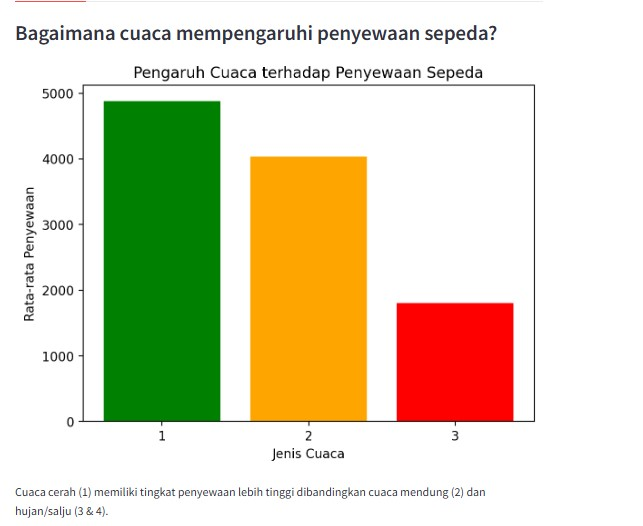

### Pertanyaan 2:

In [ ]:
# [Pertanyaan 2]

st.subheader("Penyewaan Sepeda: Hari Kerja vs. Hari Libur")
working_avg = day_df.groupby('workingday')['cnt'].mean()
st.bar_chart(working_avg)
st.write("Penyewaan sepeda umumnya lebih tinggi pada hari kerja dibandingkan hari libur.")

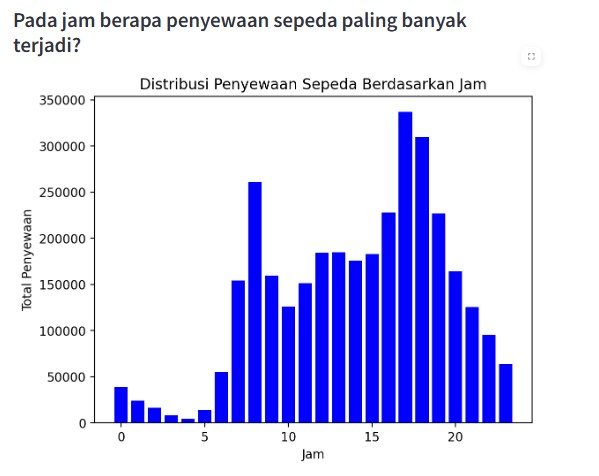

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Cuaca cerah (1) memiliki tingkat penyewaan lebih tinggi dibandingkan cuaca mendung (2) dan hujan/salju (3 & 4).
- Penyewaan sepeda paling banyak terjadi pada jam sibuk pagi (07:00 - 09:00) dan sore (17:00 - 19:00).